In [47]:
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [225]:
data = pd.read_excel('data/Freq_statistics.xlsx')

In [226]:
%%bash
ls data

Freq_statistics.xlsx
Lapse_statistics.xlsx
Sev_statistics.xlsx


In [227]:
data.head()

,Age,Experience,Horse_power,Weight,Area,Exposed,Claims
0,18,0,78,0.74,2,0.827397,1
1,18,0,79,0.82,2,0.594521,1
2,18,0,80,0.74,2,0.816438,1
3,18,0,80,0.83,2,0.621918,1
4,18,0,86,0.84,2,0.904110,1


In [249]:
data.groupby(['Claims']).Exposed.describe()

,count,mean,std,min,25%,50%,75%,max
Claims,,,,,,,,
0,3636.0,0.700818,0.230364,0.197260,0.506849,0.745205,0.909589,1.857534
1,1255.0,0.695683,0.227729,0.219178,0.495890,0.742466,0.904110,0.997260
2,91.0,0.728526,0.298381,0.252055,0.489041,0.802740,0.909589,1.775342


In [250]:
from scipy.stats import pearsonr
pearsonr(data.Exposed, data.Claims)

(-0.0004774525232424959, 0.9731229876316662)

In [228]:
data.describe()

,Age,Experience,Horse_power,Weight,Area,Exposed,Claims
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,43.712365,7.233641,136.434163,1.190974,1.518065,0.700031,0.288438
std,14.904075,8.365713,36.077912,0.294707,0.523657,0.231111,0.491754
min,18.000000,0.000000,75.000000,0.610000,1.000000,0.197260,0.000000
25%,31.000000,3.000000,106.000000,0.940000,1.000000,0.504110,0.000000
50%,44.000000,5.000000,135.000000,1.180000,2.000000,0.745205,0.000000
75%,56.000000,8.000000,168.000000,1.440000,2.000000,0.906849,1.000000
max,70.000000,50.000000,199.000000,1.790000,3.000000,1.857534,2.000000


In [251]:
y = data.Claims/data.Exposed
X = data.drop(['Claims'], axis = 1)

In [252]:
X.head()

,Age,Experience,Horse_power,Weight,Area,Exposed
0,18,0,78,0.74,2,0.827397
1,18,0,79,0.82,2,0.594521
2,18,0,80,0.74,2,0.816438
3,18,0,80,0.83,2,0.621918
4,18,0,86,0.84,2,0.904110


In [253]:
X.drop(['Horse_power', 'Weight', 'Exposed'], axis = 1, inplace = True)

In [254]:
X.head()

,Age,Experience,Area
0,18,0,2
1,18,0,2
2,18,0,2
3,18,0,2
4,18,0,2


In [255]:
X['Age*Exp'] = X.Age*X.Experience
X['Age*Area'] = X.Age*X.Area
X['Exp*Area'] = X.Experience*X.Area
X['Age*Exp*Area'] = X.Age*X.Experience*X.Area

In [256]:
X.head()

,Age,Experience,Area,Age*Exp,Age*Area,Exp*Area,Age*Exp*Area
0,18,0,2,0,36,0,0
1,18,0,2,0,36,0,0
2,18,0,2,0,36,0,0
3,18,0,2,0,36,0,0
4,18,0,2,0,36,0,0


In [501]:
import statsmodels.api as sm


X_sm = sm.add_constant(X)

binom_model = sm.GLM(y, X_sm, family=sm.families.Poisson())
binom_results = binom_model.fit()
binom_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            98317.8010
Link Function:      log              BIC:            76157.5225
Dependent Variable: Cost             Log-Likelihood: -49153.   
Date:               2019-06-24 15:44 LL-Null:        -85044.   
No. Observations:   1346             Deviance:       85812.    
Df Model:           5                Pearson chi2:   8.69e+04  
Df Residuals:       1340             Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
               Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          7.0666   0.0061 1158.4983 0.0000  7.0546  7.0785
Age           -0.0004   0.0000   -7.6673 0.0000 -0.0005 -0.0003
Experience    -0.0007   0.0001   -7.3690 0.0000 -0.0009 -0.0005
Horse_power   -0.0009   0.0001   -9.3601 0.0000 -0.0010 -0.0007
Weight        -0.2826   0.0112  -25.2799 0.0000 -0.3045 -0.2607
Area           0.4473   0.0025  176.1924 0.0000  0.4423  0.4522
===============================================================

"""

In [502]:
binom_results.aic, binom_results.bic

(98317.80097471544, 76157.52249780388)

In [259]:
residuals = data.Claims - binom_results.predict(X_sm)*data.Exposed

In [260]:
residuals.describe()

count    4982.000000
mean       -0.044159
std         0.480966
min        -5.052779
25%        -0.163809
50%        -0.042634
75%        -0.009531
max         1.687435
dtype: float64

In [248]:
residuals.describe()

count    4982.000000
mean        0.148791
std         0.401535
min        -1.003124
25%        -0.062062
50%        -0.018052
75%         0.527490
max         1.867542
dtype: float64

In [263]:
pred = np.array(binom_results.predict(X_sm)*data.Exposed)
pred[:50]

array([1.05687787, 0.75941225, 1.04287949, 0.7944082 , 1.15486655,
       0.54593691, 0.69641952, 1.15836614, 1.21086008, 1.25285523,
       1.19686169, 0.90289566, 0.069943  , 0.68942033, 0.76991103,
       0.88189809, 1.22835806, 1.25635482, 0.72791589, 5.05694966,
       1.09187383, 0.64392559, 1.23185765, 0.33946077, 0.57393368,
       0.43744945, 0.76291184, 0.50394177, 1.15836614, 1.08487464,
       0.34645996, 1.06737666, 0.68592074, 1.08137504, 1.25635482,
       1.23885684, 0.70691831, 0.85390133, 1.23885684, 0.65092478,
       1.25285523, 0.46194662, 0.93789162, 0.74541386, 1.12686978,
       0.42345107, 1.24585603, 0.41295228, 0.37580169, 0.94122809])

In [264]:
np.array(data.Claims)[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 2, 1, 1])

<h1>Sev</h1>

In [467]:
data = pd.read_excel('data/Sev_statistics.xlsx')

In [468]:
data.head()

,Age,Experience,Horse_power,Weight,Area,Exposed,Claims,Cost
0,18,0,78,0.74,2,0.827397,1,2043.0
1,18,0,79,0.82,2,0.594521,1,2162.0
2,18,0,80,0.74,2,0.816438,1,2153.0
3,18,0,80,0.83,2,0.621918,1,2209.0
4,18,0,86,0.84,2,0.904110,1,1634.0


In [469]:
data.describe()

,Age,Experience,Horse_power,Weight,Area,Exposed,Claims,Cost
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,40.823180,6.738484,151.245914,1.310208,2.045319,0.697903,1.067608,1767.109212
std,18.290711,9.166853,40.233571,0.327301,0.208081,0.233190,0.251165,464.660260
min,18.000000,0.000000,75.000000,0.610000,2.000000,0.219178,1.000000,1001.000000
25%,23.000000,1.000000,116.000000,1.030000,2.000000,0.493836,1.000000,1438.250000
50%,38.000000,3.000000,159.000000,1.380000,2.000000,0.746575,1.000000,1737.000000
75%,58.000000,7.000000,190.000000,1.610000,2.000000,0.904110,1.000000,1992.000000
max,70.000000,48.000000,199.000000,1.790000,3.000000,1.775342,2.000000,4445.000000


In [504]:
y = data.Cost
X = data.drop(['Claims', 'Cost', 'Exposed'], axis = 1)

In [507]:
import statsmodels.api as sm
offset = np.log(data.Claims.values)


X_sm = sm.add_constant(X)

binom_model = sm.GLM(y, X_sm, family=sm.families.Gamma(link=sm.genmod.families.links.log),
                    offset = offset)
binom_results = binom_model.fit()
binom_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            19484.8668
Link Function:      log              BIC:            -9603.2308
Dependent Variable: Cost             Log-Likelihood: -9736.4   
Date:               2019-06-24 15:48 LL-Null:        -10257.   
No. Observations:   1346             Deviance:       51.325    
Df Model:           5                Pearson chi2:   48.2      
Df Residuals:       1340             Scale:          0.035939  
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           8.3613   0.0573 146.0400 0.0000  8.2491  8.4735
Age             0.0001   0.0004   0.2991 0.7649 -0.0006  0.0008
Experience     -0.0010   0.0007  -1.3724 0.1700 -0.0025  0.0004
Horse_power    -0.0012   0.0007  -1.6591 0.0971 -0.0026  0.0002
Weight         -0.2302   0.0889  -2.5893 0.0096 -0.4045 -0.0560
Area           -0.2246   0.0250  -8.9907 0.0000 -0.2736 -0.1756
===============================================================

"""

In [499]:
binom_results.aic, binom_results.bic

(19484.86675522325, -9603.230802597307)

In [500]:
pred = binom_results.predict(X_sm)*np.exp(offset)
pred[:10]

0    2100.828305
1    2060.017555
2    2095.788492
3    2052.814025
4    2033.389230
5    2019.394817
6    2028.511200
7    2044.615031
8    2023.442896
9    2022.837087
dtype: float64

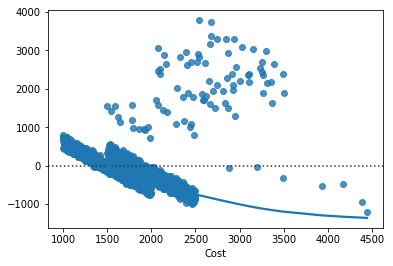

In [488]:
seaborn.residplot(y, pred, lowess=True)

In [192]:
residuals = data.Cost - binom_results.predict(X_sm)*data.Claims

In [172]:
residuals.describe()

count    1346.000000
mean      -12.136119
std       358.908099
min     -1951.547273
25%      -259.831222
50%        13.634735
75%       255.522518
max       702.938371
dtype: float64

In [193]:
residuals.describe()

count     1346.000000
mean      -476.330331
std       1792.345200
min     -10919.776069
25%       -371.977337
50%        -98.700374
75%        163.357091
max        634.062292
dtype: float64

In [197]:
data.groupby(['Claims']).Cost.describe()

,count,mean,std,min,25%,50%,75%,max
Claims,,,,,,,,
1,1255.0,1702.274900,377.897499,1001.0,1414.0,1709.0,1942.5,2500.0
2,91.0,2661.252747,608.177891,1501.0,2230.0,2651.0,3013.0,4445.0


In [411]:
pearson_res = residuals / (binom_results.predict(X_sm)*data.Claims)

In [412]:
pearson_res.describe()

count    1346.000000
mean       -0.000025
std         0.000299
min        -0.002467
25%        -0.000094
50%        -0.000029
75%         0.000125
max         0.001002
dtype: float64

In [413]:
pearson_res.describe()

count    1346.000000
mean       -0.000025
std         0.000299
min        -0.002467
25%        -0.000094
50%        -0.000029
75%         0.000125
max         0.001002
dtype: float64

In [414]:
(binom_results.predict(X_sm)*data.Claims)[40:45]

40    1504.638426
41    1513.247190
42    2994.855871
43    2869.846593
44    2142.901780
dtype: float64

In [196]:
(binom_results.predict(X_sm)/data.Claims)[40:45]

40    1606.924674
41    1625.376458
42     802.764947
43     748.475796
44    2353.355496
dtype: float64

In [180]:
data.Cost[40:45]

40    1919.0
41    1545.0
42    1915.0
43    1646.0
44    2220.0
Name: Cost, dtype: float64

<h1>Without offset</h1>

In [530]:
data = pd.read_excel('data/Freq_statistics.xlsx')
y = data.Claims
offset = - np.log(data.Exposed)
X = data.drop(['Claims', 'Exposed', 'Horse_power', 'Weight'], axis = 1)

In [531]:
X.head()

,Age,Experience,Area
0,18,0,2
1,18,0,2
2,18,0,2
3,18,0,2
4,18,0,2


In [532]:
X['Age*Exp'] = X.Age*X.Experience
X['Age*Area'] = X.Age*X.Area
X['Exp*Area'] = X.Experience*X.Area
X['Age*Exp*Area'] = X.Age*X.Experience*X.Area
X_sm = sm.add_constant(X)

In [533]:
model = sm.GLM(y, X_sm, family=sm.families.Poisson())
model_results = model.fit()
model_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
================================================================
Model:              GLM              AIC:            4693.8465  
Link Function:      log              BIC:            -40416.5809
Dependent Variable: Claims           Log-Likelihood: -2338.9    
Date:               2019-06-24 16:03 LL-Null:        -3286.7    
No. Observations:   4982             Deviance:       1930.0     
Df Model:           7                Pearson chi2:   1.74e+03   
Df Residuals:       4974             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -2.4278   0.3990 -6.0844 0.0000 -3.2099 -1.6458
Age              -0.0529   0.0098 -5.4163 0.0000 -0.0721 -0.0338
Experience       -0.7046   0.1068 -6.5993 0.0000 -0.9139 -0.4954
Area              1.2248   0.1857  6.5943 0.0000  0.8607  1.5888
Age*Exp           0.0114   0.0016  7.0524 0.0000  0.0082  0.0146
Age*Area          0.0188   0.0046  4.1114 0.0000  0.0098  0.0277
Exp*Area          0.2299   0.0490  4.6883 0.0000  0.1338  0.3260
Age*Exp*Area     -0.0038   0.0007 -5.0546 0.0000 -0.0052 -0.0023
================================================================

"""

In [534]:
frequency = model_results.predict(X_sm)
frequency[:5], (frequency * np.exp(offset))[:5]

(0    0.774699
 1    0.774699
 2    0.774699
 3    0.774699
 4    0.774699
 dtype: float64, 0    0.936308
 1    1.303065
 2    0.948876
 3    1.245661
 4    0.856864
 dtype: float64)

(4693.846490630964, -40416.580947526374)

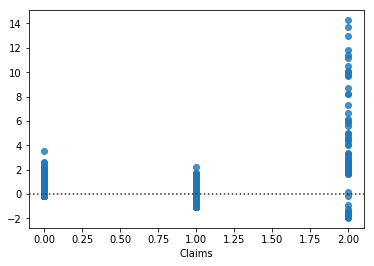

In [535]:
seaborn.residplot(y, frequency*np.exp(offset))
model_results.aic, model_results.bic

In [542]:
model_off = sm.GLM(y, X_sm, family=sm.families.Poisson(), offset=offset)
model_off_results = model_off.fit()
model_off_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
================================================================
Model:              GLM              AIC:            4986.8226  
Link Function:      log              BIC:            -40123.6048
Dependent Variable: Claims           Log-Likelihood: -2485.4    
Date:               2019-06-24 16:04 LL-Null:        -3286.7    
No. Observations:   4982             Deviance:       2223.0     
Df Model:           7                Pearson chi2:   2.39e+03   
Df Residuals:       4974             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -2.9914   0.3964 -7.5465 0.0000 -3.7684 -2.2145
Age              -0.0510   0.0097 -5.2508 0.0000 -0.0701 -0.0320
Experience       -0.6372   0.1068 -5.9673 0.0000 -0.8464 -0.4279
Area              1.2536   0.1846  6.7906 0.0000  0.8918  1.6154
Age*Exp           0.0105   0.0016  6.5080 0.0000  0.0073  0.0136
Age*Area          0.0179   0.0046  3.9317 0.0001  0.0090  0.0268
Exp*Area          0.1892   0.0493  3.8356 0.0001  0.0925  0.2858
Age*Exp*Area     -0.0032   0.0007 -4.3110 0.0000 -0.0047 -0.0017
================================================================

"""

In [543]:
frequency_off = model_off_results.predict(X_sm)
frequency_off[:5], (frequency_off * np.exp(offset))[:5]

(0    0.468414
 1    0.468414
 2    0.468414
 3    0.468414
 4    0.468414
 dtype: float64, 0    0.566129
 1    0.787885
 2    0.573728
 3    0.753176
 4    0.518094
 dtype: float64)

(4986.8226392935485, -40123.604798863795)

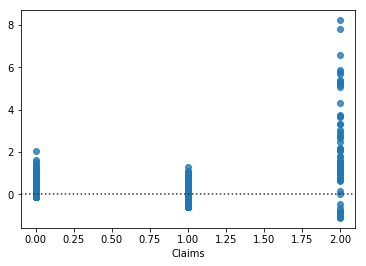

In [544]:
seaborn.residplot(y, frequency_off*np.exp(offset))
model_off_results.aic, model_off_results.bic

In [545]:
model_off = sm.GLM(y, X_sm, family=sm.families.Poisson(), offset=-offset)
model_off_results = model_off.fit()
model_off_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
================================================================
Model:              GLM              AIC:            4856.9889  
Link Function:      log              BIC:            -40253.4385
Dependent Variable: Claims           Log-Likelihood: -2420.5    
Date:               2019-06-24 16:04 LL-Null:        -3286.7    
No. Observations:   4982             Deviance:       2093.1     
Df Model:           7                Pearson chi2:   2.16e+03   
Df Residuals:       4974             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -2.1315   0.4020 -5.3029 0.0000 -2.9193 -1.3437
Age              -0.0507   0.0098 -5.1834 0.0000 -0.0699 -0.0316
Experience       -0.7665   0.1068 -7.1790 0.0000 -0.9757 -0.5572
Area              1.2571   0.1871  6.7184 0.0000  0.8904  1.6238
Age*Exp           0.0122   0.0016  7.5157 0.0000  0.0090  0.0153
Age*Area          0.0175   0.0046  3.8269 0.0001  0.0085  0.0264
Exp*Area          0.2668   0.0488  5.4632 0.0000  0.1711  0.3626
Age*Exp*Area     -0.0042   0.0007 -5.6858 0.0000 -0.0057 -0.0028
================================================================

"""

In [546]:
frequency_off = model_off_results.predict(X_sm)
frequency_off[:5], (frequency_off * np.exp(-offset))[:5]

(0    1.103246
 1    1.103246
 2    1.103246
 3    1.103246
 4    1.103246
 dtype: float64, 0    0.912823
 1    0.655903
 2    0.900733
 3    0.686129
 4    0.997456
 dtype: float64)

(4856.98891532077, -40253.43852283657)

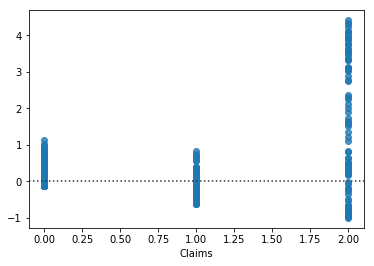

In [547]:
seaborn.residplot(y, frequency_off*np.exp(-offset))
model_off_results.aic, model_off_results.bic

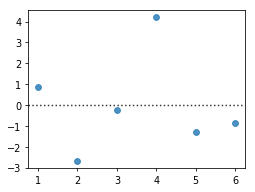

In [342]:
import seaborn
import matplotlib.pyplot as plt
import numpy
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
x = numpy.array([1, 2, 3, 4, 5, 6])
y = numpy.array([2, 1, 6, 13, 10, 13])

seaborn.residplot(x, y)

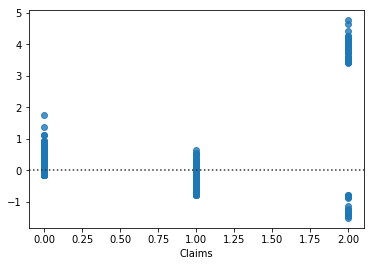

In [347]:
seaborn.residplot(y, frequency_off)

In [344]:
y

array([ 2,  1,  6, 13, 10, 13])